In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import random

[-0.15434388  0.92849725  0.97071668]


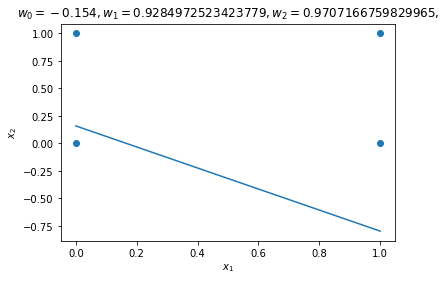

In [3]:
def activation_function(x):
    if x >= 0:
        return 1
    elif x < 0:
        return 0


class SLP:

  def __init__(self,x,y,learning_rate = 0.1):
    self.x = x
    self.y = y
    self.learning_rate = learning_rate


  def fit(self):

    l = np.ones((self.x.shape[0],1))
    self.x = np.hstack((l,x)) # the bias is always one

    weights = []
    n = 10 # how many times the machine learns
    Test_setLength = self.x.shape[0]

    # initialize with 3 random weights between 0 and 1, one for each input and one for the bias
    for i in range(self.x.shape[1]):
        weights.append(random.uniform(0, 1))

    self.pred = np.array([])
    for i in range(Test_setLength):
      self.pred = np.append(self.pred, 0)

    for i in range(n):
      for j in range(Test_setLength):
        inputs = self.x[j,:]
        expected_output = self.y[j]
        net = np.dot(inputs, weights)
        self.pred[j] = activation_function(net) # find the sign of the net
        error = expected_output - self.pred[j]
        weights += self.learning_rate * error * np.asarray(inputs) # change the weights to include the error times input, won't change if there's no error

    line_x = [0 , 1]
    line_y = [-weights[0]/weights[2] , -weights[0]/weights[2] - weights[1]/weights[2]]

    plt.figure()
    plt.scatter(x[:,0],x[:,1])
    plt.plot(line_x,line_y)
    plt.xlabel(f"$x_1$")
    plt.ylabel(f"$x_2$")
    plt.title(f"$w_0 = {weights[0]:.3f},w_1 = {weights[1]},w_2 = {weights[2]},$")

    print(weights)


  def predict(self, x):
    predict = []
    for i in range(Test_setLength):
      predict.append(self.pred[i])
    print('predict: ', predict)


  def evaluate(self, x, y):
    print('inputs\t\ttarget\t\tpredict')
    e = 0
    for i in range(Test_setLength):
      print(x[i, :], '\t\t',y[i], '\t\t', int(self.pred[i]))
      if y[i] != self.pred[i]:
        e += 1
    accuracy = ((Test_setLength - e)/Test_setLength)*100
    print('accuracy:', int(accuracy), '%')
    

    

  

x = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[1]])


c1 = SLP(x,y,0.3)
c1.fit()



